# Multiple Qubits & Entangled States

Single qubits are interesting, but individually they offer no computational advantage. We will now look at how we represent multiple qubits, and how these qubits can interact with each other. We have seen how we can represent the state of a qubit using a 2D-vector, now we will see how we can represent the state of multiple qubits.

In [1]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

## Contents


## Representing Multi-Qubit States

We saw that a single bit has two possible states, and a qubit has two complex amplitudes. Similarly, two bits have four possible states:

`00` `01` `10` `11`

And to describe the state of two qubits requires four complex amplitudes. We store these amplitudes in a 4D-vector like so:

$$ |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

The rules of measurement still work in the same way:

$$ p(|00\rangle) = |\langle 00 | a \rangle |^2 = |a_{00}|^2$$

And the same implications hold, such as the normalisation condition:

$$ |a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1$$

If we have two separated qubits, we can describe their collective state using the tensor product:

$$ |a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$

$$ 
|ab\rangle = |a\rangle \otimes |b\rangle = \begin{bmatrix} a_0 \times \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \\ a_1 \times \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} a_0 b_0 \\ a_0 b_1 \\ a_1 b_0 \\ a_1 b_1 \end{bmatrix}
$$

And following the same rules, we can use the tensor product to describe the collective state of any number of qubits. Here is an example with three qubits:

$$ 
|abc\rangle = \begin{bmatrix} a_0 b_0 c_0 \\ a_0 b_0 c_1 \\ a_0 b_1 c_0 \\ a_0 b_1 c_1 \\
                              a_1 b_0 c_0 \\ a_1 b_0 c_1 \\ a_1 b_1 c_0 \\ a_1 b_1 c_1 \\
              \end{bmatrix}
$$

If we have $n$ qubits, we will need to keep track of $2^n$ complex amplitudes. As we can see, these vectors grow exponentially with the number of qubits. This is the reason quantum computers with large numbers of qubits are so difficult to simulate. A modern laptop can easily simulate around 20 qubits, but 100 qubits is too difficult for the largest supercomputers.

Let's look at an example circuit:

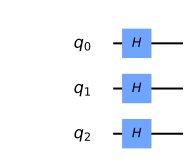

In [2]:
qc = QuantumCircuit(3)
# Apply H-gate to each circuit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw('mpl')

Each qubit is in the state $|+\rangle$, so we should see the vector:

$$ 
|+\rangle|+\rangle|+\rangle = \frac{1}{\sqrt{8}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\
                              1 \\ 1 \\ 1 \\ 1 \\
              \end{bmatrix}
$$

In [3]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
print(final_state)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


And we have our expected result.

### Quick Exercises:

1.	Write down the tensor product of the qubits:    
    a)	$|0\rangle|1\rangle$    
    b)	$|0\rangle|+\rangle$    
    c)	$|+\rangle|1\rangle$    
    d)	$|-\rangle|+\rangle$    
2.	Write the state:
    $|\psi\rangle = \tfrac{1}{\sqrt{2}}|00\rangle + \tfrac{i}{\sqrt{2}}|01\rangle $
    as two separate qubits.


## Multi-Qubit Gates

Now we know how to represent the state of multiple qubits, we are now ready to learn how qubits interact with each other. The most popular two-qubit gate is the CNOT-gate.

### The CNOT-Gate

You have come across this gate before in _The Atoms of Computation._ This gate is a conditional gate that performs an X-gate on the second qubit (target), if the state of the first qubit (control) is $|1\rangle$. The gate is drawn on a circuit like this, with `q0` as the control and `q1` as the target:

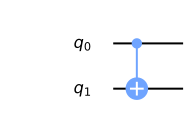

In [18]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw('mpl')
#print(type(qc.qregs[0]))

When our qubits are not in superposition of $|0\rangle$ or $|1\rangle$, this gate is very simple and intuitive to understand. Acting on our 4D-statevector, it has the matrix:

$$
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix}
$$

This matrix swaps the amplitudes of $|10\rangle$ and $|11\rangle$ in our statevector:

$$ 
|a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{11} \\ a_{10} \end{bmatrix} \begin{matrix} \\ \\ \leftarrow \\ \leftarrow \end{matrix} \begin{matrix} \\ \\ \text{These values have} \\ \text{been swapped.} \end{matrix}
$$

In [19]:
qc = QuantumCircuit(2)
# Apply H-gate to each circuit:
qc.h(0)

# Let's see the result
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
print(final_state)

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]
